In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

dataframe = pd.read_csv('insurance.csv')
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
print(dataframe.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [41]:
print(dataframe['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [42]:
df1 = dataframe
df1['sex'] = df1['sex'].replace({'female':1,'male':2})
df1['smoker'] = df1['smoker'].replace({'yes':1,'no':2})
df1['region'] = df1['region'].replace({'southwest':1,'southeast':2,'northwest':3,'northeast':4})
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,2,2,1725.55230
2,28,2,33.000,3,2,2,4449.46200
3,33,2,22.705,0,2,3,21984.47061
4,32,2,28.880,0,2,3,3866.85520


In [43]:
X = df1.drop(columns=['charges'],axis=1)
y = df1['charges']


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [45]:
# Scalling

scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
#print(X_train_scaler)
#print(X_test_scaler)

In [46]:
poly_features = PolynomialFeatures(degree=6)

X_train_poly = poly_features.fit_transform(X_train_scaler)
X_test_poly = poly_features.transform(X_test_scaler)

#print(X_train_poly)
#print(X_test_poly)

In [47]:
lin_reg = LinearRegression()
regr = lin_reg.fit(X_train_poly,y_train)


In [48]:
y_pred = lin_reg.predict(X_test_poly)
#print(y_pred)

In [49]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

10047218706722.271

In [50]:
# Error from training data

y_pred_train = lin_reg.predict(X_train_poly)
mean_absolute_error(y_train,y_pred_train)

3392.5599063373834

In [51]:
poly_features = PolynomialFeatures(degree=3)

X_train_poly = poly_features.fit_transform(X_train_scaler)
X_test_poly = poly_features.transform(X_test_scaler)

In [52]:
lin_reg = LinearRegression()
regr = lin_reg.fit(X_train_poly,y_train)

In [53]:
y_pred = lin_reg.predict(X_test_poly)

In [54]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

2729.8950002985075

<Axes: xlabel='charges'>

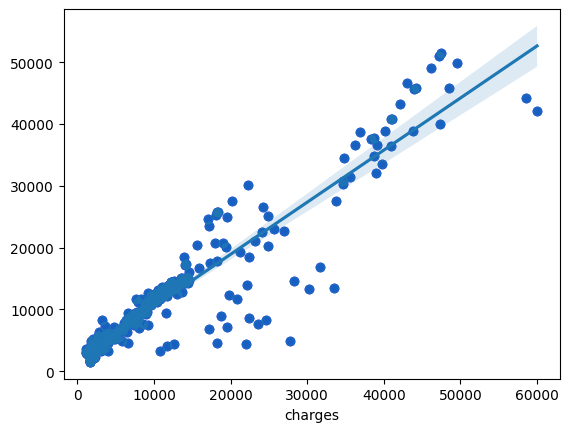

In [60]:
from matplotlib import pyplot as plt
import seaborn as sns
y_pred_train = lin_reg.predict(X_train_poly)
mean_absolute_error(y_train,y_pred_train)

plt.scatter(y_test,y_pred,color = 'b')
sns.regplot(x=y_test,y=y_pred)